<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

<hr>

<a href="https://clarusway.com/"><img align="center" src="https://i.ibb.co/Rpz9L36/clarusway-logo-black.png" width="450" height="200" alt="CLRSWY_LOGO" title="Open and Execute in Google Colaboratory"></a><br/>

<p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:130%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<p style="text-align: center;"><img src="https://i.ibb.co/Vp7VhzT/stats.png" class="img-fluid" alt="STATS" width="600" height="200"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#0000FF; font-size:150%; text-align:center; border-radius:10px 10px;">SESSION-07 (Case Study - Analysis of Cardiovascular Disease)</p>

<hr>

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">Libraries Needed in this Notebook:</p>

First we must import the related libraries of Numpy, Pandas, Matplotlib and Seaborn for our analysis. We are importing the required modules by using the import keyword. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

## <p style="background-color:#E51A59; font-family:newtimeroman; color:#FFFFFF; font-size:175%; text-align:center; border-radius:10px 10px;">Cardiovascular Disease Dataset</p>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:blue;">In this analysis, the following concepts are coverd on Cardiovascular Disease dataset;</span>
</p>

- ``true means``,
- ``confidence intervals``,
- ``one sample t test``,
- ``independent samples t test``,
- ``homogenity of variance check (Levene's test)``,
- ``One-way ANOVA``,
- ``Chi-square test``.

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Features:</span>
</p>

- ``Age`` | Objective Feature | age | int (days)
- ``Height`` | Objective Feature | height | int (cm) |
- ``Weight`` | Objective Feature | weight | float (kg) |
- ``Gender`` | Objective Feature | gender | categorical code |
- ``Systolic blood pressure`` | Examination Feature | ap_hi | int |
- ``Diastolic blood pressure`` | Examination Feature | ap_lo | int |
- ``Cholesterol`` | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- ``Glucose`` | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- ``Smoking`` | Subjective Feature | smoke | binary |
- ``Alcohol intake`` | Subjective Feature | alco | binary |
- ``Physical activity`` | Subjective Feature | active | binary |
- ``Presence or absence of cardiovascular disease`` | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

Dataset from: **[Source](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)**

### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">Data Preparation:</p>

**To mount Google Drive in a Google Colab environment, you can use the following code. This allows you to access files stored in your Google Drive directly from your Colab notebook.**

Steps to Mount Google Drive in Google Colab:

In [2]:
# Mount Google Drive in Google Colab

# from google.colab import drive  # import the drive module from google.colab.
# drive.mount('/content/drive')   # mount your Google Drive

**⭐ Run the following code to read in the ``"cardio.csv"`` file.**

In [3]:
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/cardio.csv", sep=";")

# Load the dataset
df = pd.read_csv("cardio.csv", sep=";")

In [4]:
# Display the first five rows of the dataframe

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


- ``Age`` | Objective Feature | age | int (days)
- ``Height`` | Objective Feature | height | int (cm) |
- ``Weight`` | Objective Feature | weight | float (kg) |
- ``Gender`` | Objective Feature | gender | categorical code |
- ``Systolic blood pressure`` | Examination Feature | ap_hi | int |
- ``Diastolic blood pressure`` | Examination Feature | ap_lo | int |
- ``Cholesterol`` | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- ``Glucose`` | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- ``Smoking`` | Subjective Feature | smoke | binary |
- ``Alcohol intake`` | Subjective Feature | alco | binary |
- ``Physical activity`` | Subjective Feature | active | binary |
- ``Presence or absence of cardiovascular disease`` | Target Variable | cardio | binary |

In [5]:
# Get a summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">Create a new DataFrame:</p>

**The following code is used to create a new DataFrame by randomly sampling 500 rows from an existing DataFrame.** 

In [6]:
# Create a new DataFrame getting a sample of 500 random rows
df = df.sample(500, random_state=42)

# Display the first and last five entries
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
46730,66728,21770,1,156,64.0,140,80,2,1,0,0,1,1
48393,69098,21876,1,170,85.0,160,90,1,1,0,0,1,1
41416,59185,23270,1,151,90.0,130,80,1,1,0,0,1,1
34506,49288,19741,1,159,97.0,120,80,1,1,0,0,1,1
43725,62481,18395,1,164,68.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41292,59009,16692,2,161,64.0,140,80,1,1,0,0,0,1
47244,67488,19504,1,151,73.0,90,60,1,1,0,0,1,1
13797,19693,14663,2,165,69.0,120,80,1,1,1,0,1,0
15022,21476,22715,1,154,75.0,120,80,1,1,0,0,1,1


- **``df.sample(500)``**: This method samples 500 rows from the DataFrame df.
- **``random_state=42``**: This parameter sets the seed for the random number generator, ensuring that you get the same sample each time you run this code. This is important for reproducibility.

**The following code snippet returns a tuple representing the dimensions of the DataFrame. Specifically, it provides the number of rows and columns in the format (number of rows, number of columns).**

In [7]:
# Checking the number of rows and columns

df.shape

(500, 13)

**The [df.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) method provides a summary of the statistical properties of the numerical columns in a DataFrame. This summary includes various statistics that help you understand the ``distribution`` and ``characteristics`` of your data.**

In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,49656.324000,19460.940000,1.368000,164.746000,74.093400,127.91200,98.908000,1.338000,1.192000,0.07800,0.046000,0.762000,0.492000
std,27694.652229,2444.264657,0.482744,8.017609,14.340822,40.82349,130.985839,0.651617,0.540111,0.26844,0.209695,0.426286,0.500437
min,172.000000,14319.000000,1.000000,144.000000,43.000000,-120.00000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,26990.500000,17804.000000,1.000000,159.000000,65.000000,120.00000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000
50%,49225.500000,19669.000000,1.000000,165.000000,72.000000,120.00000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000
75%,72126.500000,21326.250000,2.000000,170.000000,80.000000,140.00000,90.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000
max,99934.000000,23670.000000,2.000000,198.000000,160.000000,907.00000,1200.000000,3.000000,3.000000,1.00000,1.000000,1.000000,1.000000


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:blue;">Overview of the Statistics:</span>
</p>

- **``Count``**: Each column has 500 non-null entries, indicating a complete dataset for the 500 sampled cases without missing values.
- **``Mean``**: The average values for each column provide insights into the central tendency of the data.
For instance, the mean of 49656.32 for the first column suggests that this variable (possibly income or a similar metric) generally falls around this value.
- **``Standard Deviation (std)``**: The standard deviation indicates how much variation there is from the mean.
A higher standard deviation (e.g., 27694.65 for the first column) suggests a wide range of values, while a lower standard deviation (e.g., 0.48 for the third column) indicates that values are clustered closely around the mean.
- **``Minimum (min)``**: The minimum values reveal the lowest observations in each column. For example, the first column has a minimum value of 172, indicating the lowest recorded value in this variable.
- **``25th Percentile (25%)``**: This value indicates that 25% of the data falls below this point. For the first column, 26990.50 means that a quarter of the observations are below this value.
- **``Median (50%)``**: The median value represents the middle point of the data. For example, a median of 49225.50 for the first column shows that half of the values are below this point.
- **``75th Percentile (75%)``**: This value indicates that 75% of the data is below this point. For instance, 72126.50 for the first column signifies that three-quarters of the observations fall below this value.
- **``Maximum (max)``**: The maximum values show the highest observations in each column. For the first column, a maximum of 99934 indicates that this is the highest recorded value in the dataset.

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:blue;">Some Column-Specific Insights:</span>
</p>

- **``First Column (id)``**: Average: ~49656.32, Std: ~27694.65, Min: 172, Max: 99934
   - This suggests a wide range and variability in the data with a considerable average.
- **``Second Column (age)``**: Average: ~19460.94, Std: ~2444.26, Min: 14319, Max: 23670
   - Less variability compared to the first column, with values clustered closer to the mean.
- **``Third Column (gender)``**: Average: ~1.37, Std: ~0.48, Min: 1, Max: 2
   - Indicates a binary or categorical-like distribution, with most values around 1.
- **``Fourth Column (height)``**: Average: ~164.75, Std: ~8.02, Min: 144, Max: 198
   - This suggests a moderate range and variability in height, with most values clustering around the average height of approximately 164.75 cm.
- **``Fifth Column (weight)``**: Average: ~74.09, Std: ~14.34, Min: 43, Max: 160
   - Indicates a wider variability in weight compared to height, with an average weight of about 74.09 kg and a significant range, suggesting diverse body weights in the sample.
- **``Sixth Column (ap_hi)``**: Average: ~127.91, Std: ~40.82, Min: -120, Max: 907
   - This indicates a wide range and high variability in the data, suggesting that this column may represent a measurement with significant outliers or variation.
- **``Seventh Column (ap_lo)``**: Average: ~98.91, Std: ~130.99, Min: 0, Max: 1200
   - The average of approximately 98.91 with a very high standard deviation indicates extreme variability, suggesting this column could represent a count or measurement with significant outliers.
- **``Eighth Column (agcholesterole)``**: Average: ~1.34, Std: ~0.65, Min: 1, Max: 3
   - This suggests a categorical-like distribution, with values primarily around 1 but with some individuals reaching up to 3, indicating a small range of categories.
- **``Ninth Column (gluc)``**: Average: ~1.19, Std: ~0.54, Min: 1, Max: 3
   - Similar to the eighth column, this indicates a categorical distribution with most values clustered around 1 and a few reaching 3, suggesting limited categories.
- **``Tenth Column (smoke)``**: Average: ~0.08, Std: ~0.27, Min: 0, Max: 1
   - This suggests a binary distribution, where most values are 0, with a few instances of 1, indicating the presence of a specific condition or characteristic.
- **``Eleventh Column (alco)``**: Average: ~0.05, Std: ~0.21, Min: 0, Max: 1
   - Similar to the tenth column, this indicates a binary-like variable with most values at 0 and a small number of instances of 1.
- **``Twelfth Column (active)``**: Average: ~0.76, Std: ~0.43, Min: 0, Max: 1
   - This indicates a distribution where the majority of values are around 1, suggesting that this variable is more common in the sample.
- **``Thirteenth Column (cardio)``**: Average: ~0.49, Std: ~0.50, Min: 0, Max: 1
   - This suggests a balanced distribution between 0 and 1, indicating a variable that may represent a binary outcome with a near-equal split in the sample.

<hr>

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">Feature Engineering:</p>

**⭐ Let's get rid of the outliers, moreover ``blood pressure could NOT be negative value!``**

In [9]:
# Display the first five entries after setting index
display(df.head())

# Set "id" feature as index
df.set_index(['id'], inplace=True)

# Display the first five entries after setting index
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
46730,66728,21770,1,156,64.0,140,80,2,1,0,0,1,1
48393,69098,21876,1,170,85.0,160,90,1,1,0,0,1,1
41416,59185,23270,1,151,90.0,130,80,1,1,0,0,1,1
34506,49288,19741,1,159,97.0,120,80,1,1,0,0,1,1
43725,62481,18395,1,164,68.0,120,80,1,1,0,0,1,0


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
66728,21770,1,156,64.0,140,80,2,1,0,0,1,1
69098,21876,1,170,85.0,160,90,1,1,0,0,1,1
59185,23270,1,151,90.0,130,80,1,1,0,0,1,1
49288,19741,1,159,97.0,120,80,1,1,0,0,1,1
62481,18395,1,164,68.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59009,16692,2,161,64.0,140,80,1,1,0,0,0,1
67488,19504,1,151,73.0,90,60,1,1,0,0,1,1
19693,14663,2,165,69.0,120,80,1,1,1,0,1,0


- **``df.set_index(['id'])``**: This method changes the DataFrame's index to the values in the id column. The id column will no longer be a part of the DataFrame's columns but will instead serve as the index. This is useful for referencing rows by their unique identifiers.
- **``inplace=True``**: This parameter means that the operation will modify the original DataFrame df directly, rather than returning a new DataFrame with the updated index.

<hr>

**The following code converts the ``"age"`` column ``from days to years`` by dividing the age (measured in days) by 365 and rounding the result to two decimal places.**

In [10]:
df["age"] = np.round(df.age/365, 2)
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
66728,59.64,1,156,64.0,140,80,2,1,0,0,1,1
69098,59.93,1,170,85.0,160,90,1,1,0,0,1,1
59185,63.75,1,151,90.0,130,80,1,1,0,0,1,1


**The following code visualizes the distribution of the ``"age"`` column in your DataFrame; however, it's not a good approach to make a valueable comparison for the distributtions of sall columns.**

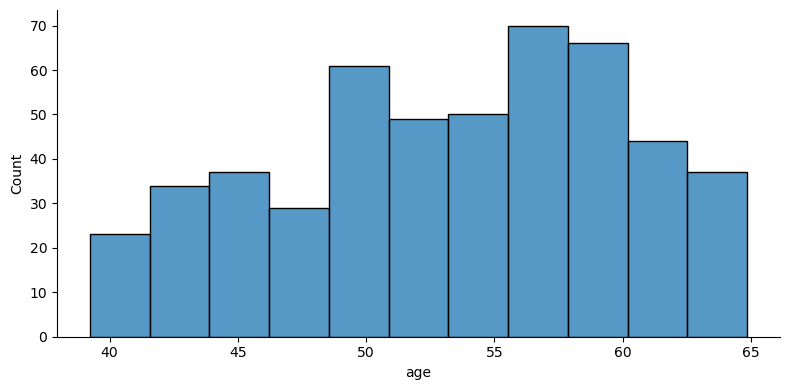

In [11]:
# %matplotlib inline

sns.displot(x="age", height=4, aspect=2, data=df);

**This approach allows us to visualize the distributions of all columns side by side in a single figure, making comparisons easier.**

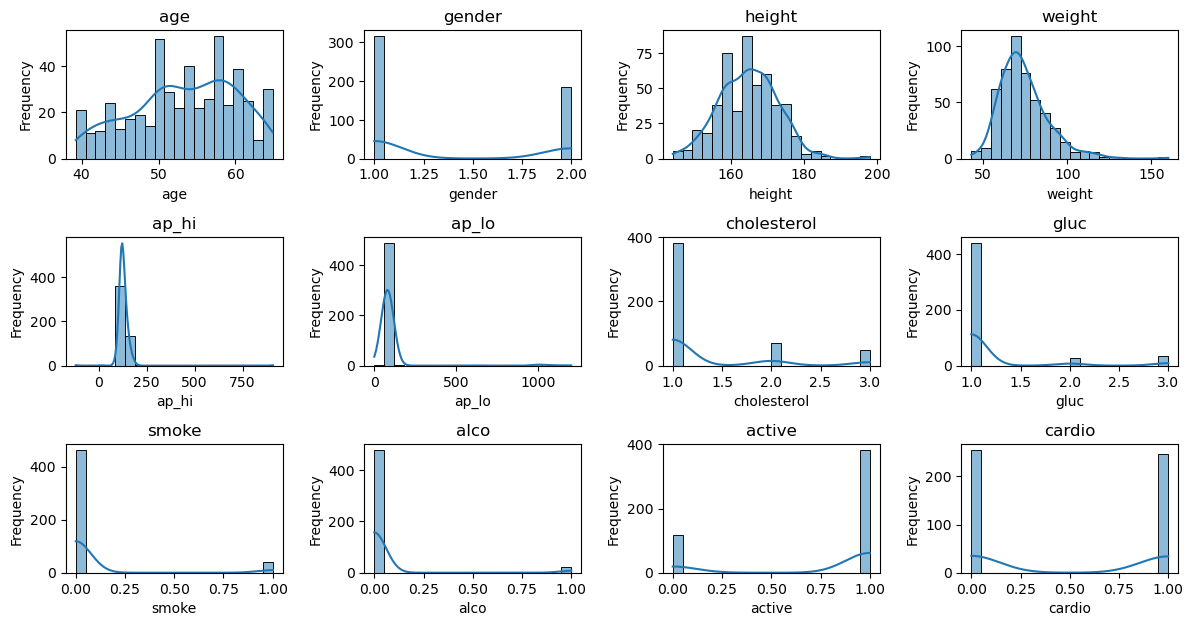

In [12]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create subplots for each column
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)  # Adjust the number of rows and columns as needed
    sns.histplot(df[col], kde=True, bins=20)  # You can use kde=False for just histograms
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

# for col in df.columns:
#     sns.displot(x=col, height=4, aspect=2, data=df);

- **``plt.figure(figsize=(12, 8))``**: Sets the overall figure size.
- **``plt.subplot(4, 4, i)``**: Creates a grid of subplots. Adjust the numbers based on the number of columns in your DataFrame.
- **``sns.histplot(...)``**: Plots the histogram with an option to include a kernel density estimate (KDE).
- **``plt.tight_layout()``**: Adjusts subplot parameters to give specified padding, ensuring that the subplots don't overlap.

**The following code creates boxplots for each column in the DataFrame. Boxplots provide a visual representation of the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.**

**As such, we can get a clear visual comparison of the distributions and ``potential outliers`` for each column in the DataFrame.**

age
gender
height
weight
ap_hi
ap_lo
cholesterol
gluc
smoke
alco
active
cardio


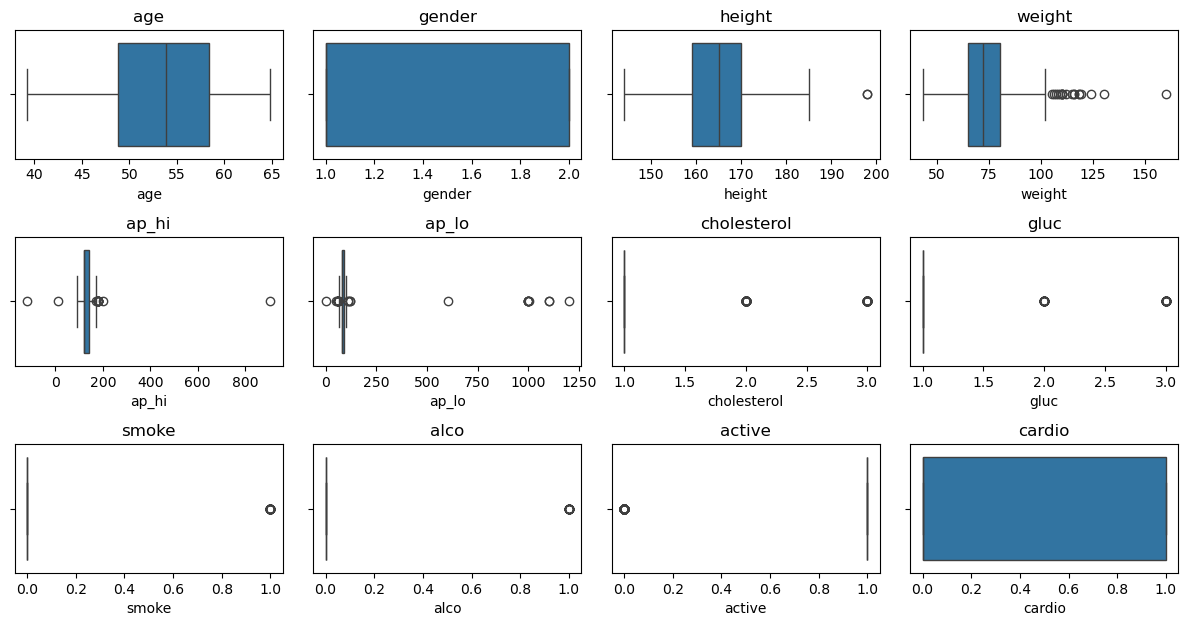

In [13]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create subplots for each column
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(x=df[col])  # Boxplot for each column
    plt.title(col)
    plt.xlabel(col)
    print(col)
# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

- **``First Column (Age)``**
  - **``Histogram``**: A normal distribution indicates that most individuals fall within a typical age range.
  - **``Boxplot``**: If there are outliers (e.g., very young or very old ages), they may represent specific cases worth further investigation.

- **``Second Column (Gender)``**
  - **``Histogram``**: A roughly binary distribution suggests that the values are concentrated around two categories.
  - **``Boxplot``**: Minimal or no outliers indicate a consistent dataset, suggesting reliability in how gender is recorded.

- **``Third Column (Height)``**
  - **``Histogram``**: If the distribution is roughly normal, it indicates that most values cluster around an average height.
  - **``Boxplot``**: Outliers may indicate unusually tall or short individuals, which could be worth investigating, especially if they seem implausible.

- **``Fourth Column (Weight)``**
  - **``Histogram``**: A right-skewed distribution suggests that there are heavier individuals that influence the average.
  - **``Boxplot``**: Outliers on the high end could indicate extreme weights, possibly due to data entry errors or significant variances.

- **``⭐ Fifth Column (ap_hi)``**
  - **``Histogram``**: A right-skewed distribution suggests that a few individuals have significantly high systolic blood pressure readings.
  - **``Boxplot``**: Outliers may suggest individuals with extremely high blood pressure, indicating potential health risks that should be assessed.

- **``⭐ Sixth Column (ap_lo)``**
  - **``Histogram``**: If the distribution is skewed, it may imply that many individuals have low diastolic blood pressure readings.
  - **``Boxplot``**: Outliers might indicate low or high blood pressure readings that warrant further investigation.

- **``Seventh Column (Cholesterol)``**
  - **``Histogram``**: A right-skewed distribution could indicate that some individuals have very high cholesterol levels.
  - **``Boxplot``**: Outliers may indicate unusually high cholesterol levels, which could reveal potential health concerns.

- **``Eighth Column (Gluc)``**
  - **``Histogram``**: A skewed distribution may suggest abnormal glucose levels in some individuals.
  - **``Boxplot``**: Outliers may indicate abnormal glucose levels, potentially suggesting risks for diabetes or other health issues.

- **``Ninth Column (Smoke)``**
  - **``Histogram``**: If the distribution is binary, expect peaks at values representing smokers and non-smokers.
  - **``Boxplot``**: Very few or no outliers indicate that the data is mostly concentrated at specific values, with rare cases possibly indicating misclassification.

- **``Tenth Column (Alco)``**
  - **``Histogram``**: A binary distribution suggests that most values cluster around non-drinkers and drinkers.
  - **``Boxplot``**: Similar to smoke, minimal outliers suggest that most data accurately captures alcohol consumption, though outliers could indicate rare cases.

- **``Eleventh Column (Active)``**
  - **``Histogram``**: A binary distribution will show concentration of values representing active versus inactive individuals.
  - **``Boxplot``**: Few or no outliers suggest that most data accurately represents activity levels, with occasional exceptions.

- **``Twelfth Column (Cardio)``**
  - **``Histogram``**: A binary distribution indicates that values are concentrated around cardiovascular health statuses (e.g., healthy vs. unhealthy).
  - **``Boxplot``**: Outliers might indicate rare cases of cardiovascular issues, but generally, this data should be well-defined.

<hr>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👨‍🔧 <span style="color:blue;">Let's examine the columns of ``"ap_hi"`` and ``"ap_lo"`` in more detail:</span>
</p>

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">👨🏼‍💻 Domain Knowledge:</p>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">In the literature, normal ranges for blood pressure are typically defined as follows:</span>
</p>

- **``Systolic Blood Pressure (SBP):``**
   - **``Normal Range``**: 90 mmHg to 120 mmHg
   - **``Elevated``**: 120 mmHg to 129 mmHg
   - **``Hypertension Stage 1``**: 130 mmHg to 139 mmHg
   - **``Hypertension Stage 2``**: 140 mmHg or higher

- **``Diastolic Blood Pressure (DBP):``**
   - **``Normal Range``**: 60 mmHg to 80 mmHg
   - **``Elevated``**: 80 mmHg to 89 mmHg
   - **``Hypertension Stage 1``**: 80 mmHg to 89 mmHg
   - **``Hypertension Stage 2``**: 90 mmHg or higher

- **``Minimum and Maximum Values Noted in Literature:``**
   - **``Minimum SBP``**: While the theoretical minimum is around 90 mmHg, values lower than this (e.g., in cases of severe    - **``hypotension) can occur but are often considered pathological.
   - **``Maximum SBP``**: There are cases reported of SBP exceeding 250 mmHg, particularly in hypertensive crises.
   - **``Minimum DBP``**: The theoretical minimum is around 60 mmHg, with lower values indicating severe hypotension.
   - **``Maximum DBP``**: Values can exceed 120 mmHg in extreme cases of hypertension.

**The following code generates two boxplots side by side for ``"ap_hi (systolic blood pressure)"`` and ``"ap_lo (diastolic blood pressure)"`` to check potential outliers ``BEFORE`` handling them.**

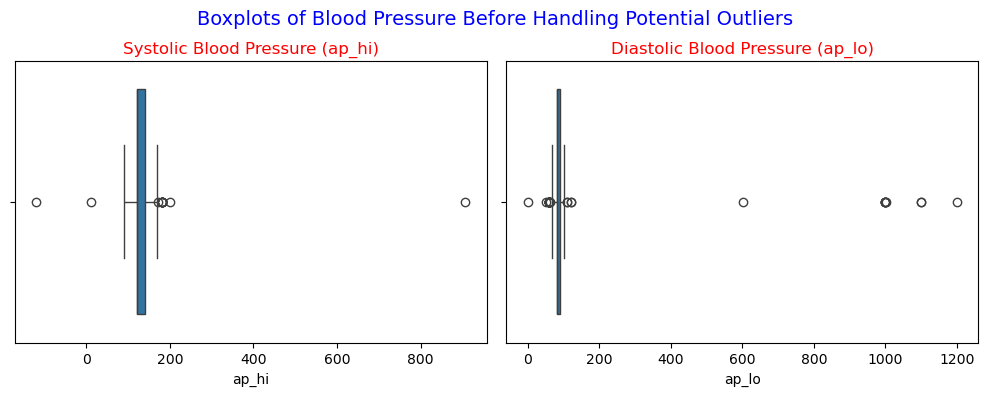

In [14]:
# Set the figure size
plt.figure(figsize=(10, 4))

# Create the first boxplot for ap_hi
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(x="ap_hi", data=df)
plt.title('Systolic Blood Pressure (ap_hi)', color="r", fontsize=12)

# Create the second boxplot for ap_lo
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(x="ap_lo", data=df)
plt.title('Diastolic Blood Pressure (ap_lo)', color="r", fontsize=12)

# Add a main title
plt.suptitle('Boxplots of Blood Pressure Before Handling Potential Outliers', color="b", fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top to accommodate the main title

# Display the plot
plt.show()

**The following code fiters ``"ap_hi"`` feature in the DataFrame based on the ``Domain Knowledge`` above.**

In [15]:
df = df[(df['ap_hi'] < 300) & (df['ap_hi'] > 0)]

- **``df['ap_hi'] < 300``**: This condition checks for systolic blood pressure values less than 300.
- **``df['ap_hi'] > 0``**: This condition checks for systolic blood pressure values greater than 0.
&: This operator combines the two conditions, ensuring both must be true for a row to be included in the filtered DataFrame.
- **``df[...]``**: The entire expression is enclosed in parentheses to ensure proper evaluation order.

In [16]:
df = df[(df['ap_lo'] < 250) & (df['ap_lo'] > 0)]

- **``df['ap_lo'] < 250``**: This checks for diastolic blood pressure values less than 250.
- **``df['ap_lo'] > 0``**: This checks for diastolic blood pressure values greater than 0.
&: Combines the two conditions so both must be true for a row to be included.
- **``df[...]``**: Encloses the entire condition to ensure it is evaluated correctly.

**The following code generates two boxplots side by side for ``"ap_hi (systolic blood pressure)"`` and ``"ap_lo (diastolic blood pressure)"`` to check potential outliers ``AFTER`` handling them.**

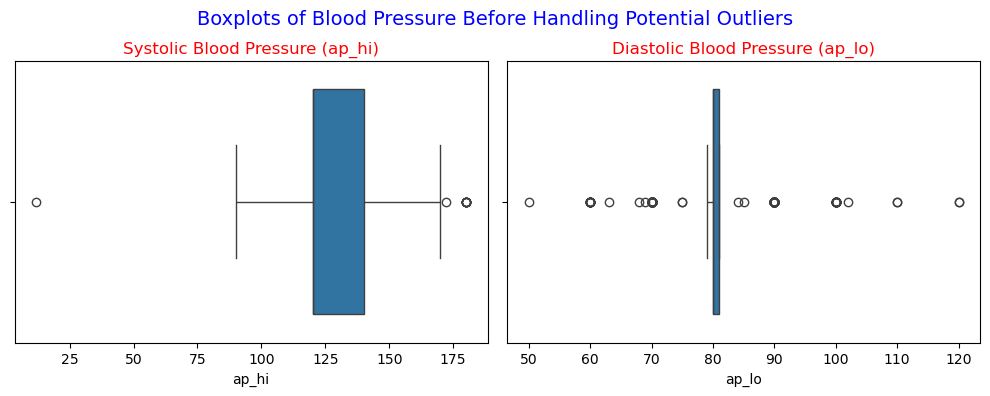

In [17]:
# Set the figure size
plt.figure(figsize=(10, 4))

# Create the first boxplot for ap_hi
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(x="ap_hi", data=df)
plt.title('Systolic Blood Pressure (ap_hi)', color="r", fontsize=12)

# Create the second boxplot for ap_lo
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(x="ap_lo", data=df)
plt.title('Diastolic Blood Pressure (ap_lo)', color="r", fontsize=12)

# Add a main title
plt.suptitle('Boxplots of Blood Pressure Before Handling Potential Outliers', color="b", fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top to accommodate the main title

# Display the plot
plt.show()

In [18]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.00000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,53.361086,1.366803,164.809426,74.060861,126.288934,80.67418,1.334016,1.186475,0.077869,0.047131,0.764344,0.483607
std,6.697971,0.482427,8.025278,14.363246,17.540932,9.28769,0.648098,0.532382,0.268240,0.212137,0.424843,0.500244
min,39.230000,1.000000,144.000000,43.000000,12.000000,50.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.827500,1.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.895000,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.492500,2.000000,170.000000,80.000000,140.000000,81.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.850000,2.000000,198.000000,160.000000,180.000000,120.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Based on the summary statistics provided for the features after filtering, here are interpretations for the two specific features, which are ``ap_hi (systolic blood pressure)`` and ``ap_lo (diastolic blood pressure)``:

- **``Systolic Blood Pressure (ap_hi)``**
   - **``Count``**: 488 entries, indicating a complete dataset for this feature after filtering.
   - **``Mean``**: 164.81 mmHg, which is higher than the normal range (120 mmHg), suggesting that the sample may have a higher prevalence of hypertension.
   - **``Standard Deviation``**: 8.03 mmHg, indicating moderate variability around the mean, which means that while most values are clustered around the mean, there are some that are significantly higher or lower.
   - **``Minimum``**: 144 mmHg, which is already above the normal threshold, indicating that there are no low values in this filtered dataset.
   - **``25th Percentile (Q1)``**: 159 mmHg, showing that 25% of the data points have systolic blood pressure values below this, reinforcing the tendency towards higher readings.
   - **``Median (50th Percentile)``**: 165 mmHg, which further indicates that more than half of the entries are above the normal range, reinforcing the hypertensive trend.
   - **``75th Percentile (Q3)``**: 170 mmHg, suggesting that 75% of the data have systolic blood pressure lower than this value, again showing a trend toward higher values.
   - **``Maximum``**: 198 mmHg, indicating some extreme cases of high blood pressure, which may require medical attention.

- **``Diastolic Blood Pressure (ap_lo)``**
   - **``Count``**: 488 entries, indicating a complete dataset for this feature after filtering.
   - **``Mean``**: 74.06 mmHg, which is within the normal range (60-80 mmHg), suggesting that overall diastolic pressures are generally acceptable in this dataset.
   - **``Standard Deviation``**: 14.36 mmHg, indicating higher variability compared to systolic pressure, which suggests a wider range of readings.
   - **``Minimum``**: 43 mmHg, which is quite low and could indicate cases of hypotension.
   - **``25th Percentile (Q1)``**: 65 mmHg, suggesting that a quarter of the data points are below this level, indicating some individuals with low diastolic pressure.
   - **``Median (50th Percentile)``**: 72 mmHg, which is still within the normal range, suggesting a general trend toward healthy diastolic pressures.
   - **``75th Percentile (Q3)``**: 80 mmHg, close to the upper limit of the normal range, indicating that a significant portion of the data is approaching higher diastolic pressures.
   - **``Maximum``**: 160 mmHg, indicating a few extreme cases of high diastolic pressure, which may also require medical consideration.


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Summary:</span>
</p>

   - **``ap_hi``**: The systolic blood pressure values show a concerning trend towards hypertension, with all values above 144 mmHg and significant cases approaching 200 mmHg.
   - **``ap_lo``**: The diastolic blood pressure values are generally within a healthy range, but the presence of extreme low and high values indicates variability that could be a cause for concern in specific cases.

## <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">Task-01: Is the Systolic blood pressure population mean 122 mmhg?</p>


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">``ap_hi`` => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over.</span>
</p>

### <p style="background-color:#b82aad; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">⭐ What is the mean for Systolic blood pressure?</p>

In [19]:
df.ap_hi.mean()

126.2889344262295

### <p style="background-color:#b82aad; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">⭐ What is the std dev. for Systolic blood pressure?</p>

In [20]:
df.ap_hi.std()

17.54093249003375

### <p style="background-color:#b82aad; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">⭐ What is the standard error of the mean for Systolic blood pressure?</p>

In [21]:
df.ap_hi.sem()

0.7940407046333289

In [22]:
# df.ap_hi.std()/np.sqrt(df.shape[0])

### <p style="background-color:#b82aad; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">⭐ What are the descriptive statistics of the mean for Systolic blood pressure?</p>

In [23]:
df.ap_hi.describe()

count    488.000000
mean     126.288934
std       17.540932
min       12.000000
25%      120.000000
50%      120.000000
75%      140.000000
max      180.000000
Name: ap_hi, dtype: float64

### <p style="background-color:#b82aad; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">⭐ Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs):</p>

#### <p style="background-color:#b82aad; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">Confidence Interval using the t Distribution:</p>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:red;">Key Notes about Confidence Intervals:</span>
</p>

- 💡 A point estimate is a single number.
- 💡 A confidence interval, naturally, is an interval.
- 💡 Confidence intervals are the typical way to present estimates as an interval range.
- 💡 The point estimate is located exactly in the middle of the confidence interval.
- 💡 However, confidence intervals provide much more information and are preferred when making inferences.
- 💡 The more data you have, the less variable a sample estimate will be.
- 💡 The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

<hr>

**The following code computes a ``95%`` ``confidence interval`` for the mean of the ``"ap_hi"`` (systolic blood pressure) values in the DataFrame.**

In [24]:
# 95% Confidence Interval

# stats.t.interval(0.95, len(df.ap_hi)-1, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

# Compute the confidence interval
confidence_interval = stats.t.interval(0.95,                     # Confidence level (95%)
                                       len(df.ap_hi) - 1,        # Degrees of freedom (n-1)
                                       loc=df.ap_hi.mean(),      # Mean of ap_hi
                                       scale=df.ap_hi.sem())     # Standard error of the mean

confidence_interval

(124.72876584967166, 127.84910300278734)

- **``0.95``**: This indicates that you want a 95% confidence interval. This means ``you can be 95% confident that the true mean falls within this interval``.
- **``len(df.ap_hi) - 1``**: This is the ``degrees of freedom`` for the sample, which is the number of observations minus one.
- **``loc=df.ap_hi.mean()``**: This gives the ``mean`` of the ``"ap_hi"`` values, which serves as the ``center of the confidence interval``.
- **``scale=df.ap_hi.sem()``**: This calculates the ``standard error of the mean (SEM)``, which is the standard deviation divided by the square root of the sample size. It gives an estimate of how much the sample mean is expected to vary from the true population mean.

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Interpretation of the Decision:</span>
</p>

  - The output of this code will give us two values, which represent the ``lower`` and ``upper bounds`` of the 95% confidence interval for the mean systolic blood pressure in your dataset.

**The following code creates a normal distribution plot showing the average and the confidence interval for the provided values.**

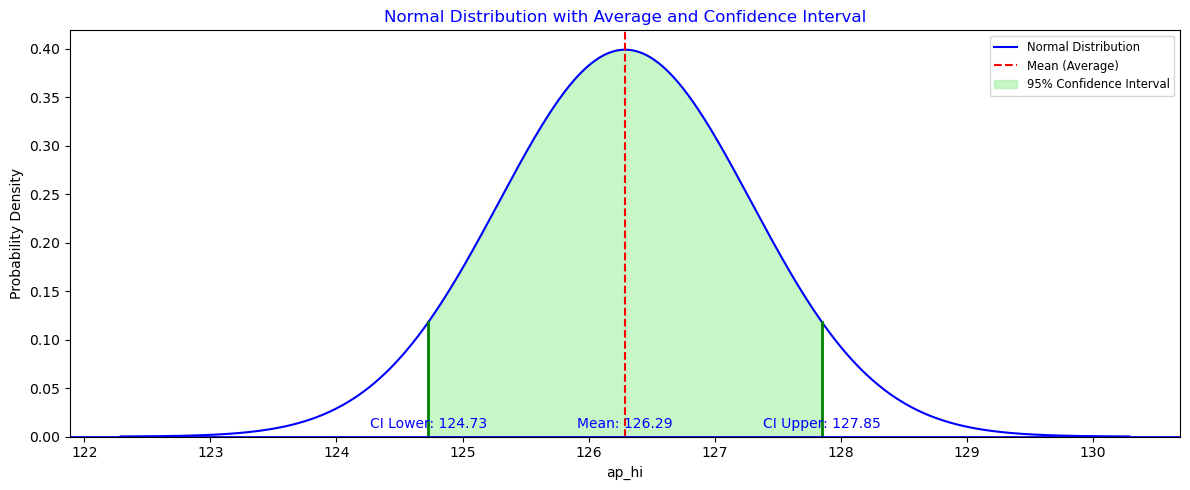

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given values
mean = 126.288934
ci_lower = 124.72876584967166
ci_upper = 127.84910300278734

# Define the standard deviation (assumed for demonstration purposes)
std_dev = 1  # You can adjust this based on your data

# Create a range of x values
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Calculate the normal distribution
y = norm.pdf(x, mean, std_dev)

# Create the plot
plt.figure(figsize=(12, 5))
plt.plot(x, y, label='Normal Distribution', color='blue')

# Mark the average
plt.axvline(mean, color='red', linestyle='--', label='Mean (Average)', ymin=0, ymax=1)

# Mark the confidence interval
plt.plot([ci_lower, ci_lower], [0, norm.pdf(ci_lower, mean, std_dev)], color='green', linewidth=2)
plt.plot([ci_upper, ci_upper], [0, norm.pdf(ci_upper, mean, std_dev)], color='green', linewidth=2)

# Fill the area between the confidence interval lines with light green
plt.fill_between(x, 0, y, where=(x>=ci_lower) & (x<=ci_upper), color='lightgreen', alpha=0.5, label='95% Confidence Interval')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Normal Distribution with Average and Confidence Interval', color='blue')
plt.xlabel('ap_hi')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Add mean and confidence interval values to the chart
plt.text(mean, 0.02, f'Mean: {mean:.2f}', color='blue', fontsize=10, ha='center', va='top')
plt.text(ci_lower, 0.02, f'CI Lower: {ci_lower:.2f}', color='blue', fontsize=10, ha='center', va='top')
plt.text(ci_upper, 0.02, f'CI Upper: {ci_upper:.2f}', color="blue", fontsize=10, ha='center', va='top')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Adjust x-axis tick labels
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility

# Remove grids
plt.grid(False)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

#### <p style="background-color:#b82aad; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">One Sample t-Test:</p>


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:blue;">Manuel Calculation:</span>
</p>

<img src=https://i.ibb.co/nsxqsbY/t-formula.png width="500" height="200">

**⭐ Investigate the given task by using One Sample t Test.**

- Key Notes about Hypothesis Testing (Significance Testing)

  - 💡 Assumptions
  - 💡 Null and Alternative Hypothesis
  - 💡 Test Statistic
  - 💡 P-value
  - 💡 Conclusion

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-01: Stating the null (H0) and alternative hypothesis (Ha or H1).</strong></p>

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-02-03: Calculating Test Statistic & p-value (the t-test for the means of two independent samples of scores):</strong></p>

In [26]:
oneSamp = stats.ttest_1samp(df.ap_hi, 122)
oneSamp

TtestResult(statistic=5.4014037330870135, pvalue=1.0358934541616901e-07, df=487)

**Test Statistic:**

In [27]:
# Displaying test statistic

oneSamp.statistic

5.4014037330870135

- The test statistic is approximately **``5.40``**. This value indicates how many standard deviations the sample mean is from the null hypothesis value (122 mmHg). A **``higher value``** suggests a **``significant difference``**.

**P Value:**

In [28]:
# Displaying p-value

oneSamp.pvalue

1.0358934541616901e-07

- The **``p-value``** is **``approximately 1.04 × 10⁻⁷``**, which is **``extremely small``**. The p-value indicates the probability of observing the test results (or more extreme) under the null hypothesis.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-04: Comparing Test Statistic to Critical Value to Make a decision:</strong></p>

In [29]:
# Comparing p-value and alpha

alpha = 0.05

if oneSamp.pvalue < alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


- Since the p-value (1.04×10−7) is much smaller than 0.05, you reject the null hypothesis (H₀).
- This means there is strong statistical evidence to support the alternative hypothesis (H₁), suggesting that the average systolic blood pressure (ap_hi) of the population is indeed greater than 122 mmHg.
<hr>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Interpretation of the Decision:</span>
</p>

 - **``Clinical Implications``**: The finding suggests that the population from which the sample is drawn has a higher average systolic blood pressure than 122 mmHg, which may raise concerns about hypertension or related health issues.
 - **``Further Investigation``**: It may be prudent to investigate the causes of elevated blood pressure in this population and consider public health interventions or further studies to understand the implications of these findings.
 - **``Statistical Significance``**: The results are statistically significant, indicating that the observed difference is unlikely to have occurred by random chance.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-05: Visualizing the results:</strong></p>

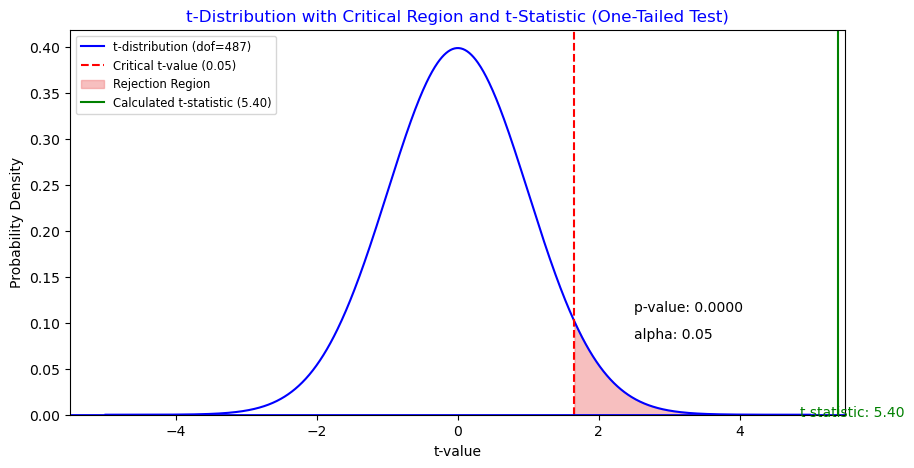

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Given values from your t-test
t_statistic = 5.4014037330870135
p_value = 1.0358934541616901e-07
dof = 487
alpha = 0.05

# Define the range for the t-distribution plot
x = np.linspace(-5, 5, 1000)

# Calculate the t-distribution
y = t.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the t-distribution
plt.plot(x, y, label=f't-distribution (dof={dof})', color='blue')

# Mark the critical t-value for alpha (one-tailed test)
t_critical = t.ppf(1 - alpha, dof)
plt.axvline(t_critical, color='red', linestyle='--', label=f'Critical t-value ({alpha})')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Fill the rejection region with light red for one-tailed test (right tail)
plt.fill_between(x, 0, y, where=(x >= t_critical), color='lightcoral', alpha=0.5, label='Rejection Region')

# Mark the calculated t-statistic
plt.axvline(t_statistic, color='green', linestyle='-', label=f'Calculated t-statistic ({t_statistic:.2f})')

# Add text for p-value and alpha
plt.text(2.5, 0.112, f'p-value: {p_value:.4f}', fontsize=10)
plt.text(2.5, 0.083, f'alpha: {alpha}', fontsize=10)
plt.text(t_statistic + 0.2, 0.01, f't statistic: {t_statistic:.2f}', color='green', fontsize=10, ha='center', va='top')

# Add titles and labels
plt.title('t-Distribution with Critical Region and t-Statistic (One-Tailed Test)', color='blue')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>🤔💭 What if it was two-tailed hypothesis?</strong></p>

Modify the Null and Alternative Hypotheses:

Null Hypothesis (H₀): H0: µ = 122 
The average systolic blood pressure (ap_hi) of the population is EQUAL to 122. 

Alternative Hypothesis (H₁): H1: µ ≠ 122 
The average systolic blood pressure (ap_hi) of the population is NOT EQUAL to 122. 

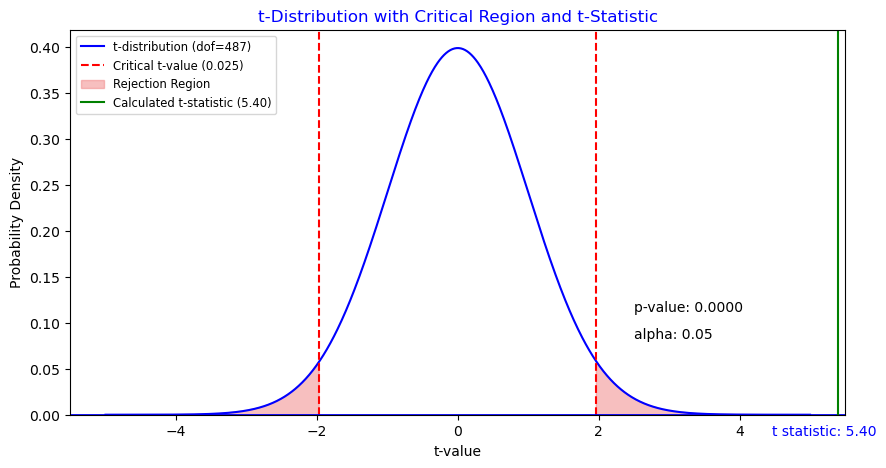

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Given values from your t-test
t_statistic = 5.4014037330870135
p_value = 1.0358934541616901e-07
dof = 487
alpha = 0.05

# Define the range for the t-distribution plot
x = np.linspace(-5, 5, 1000)

# Calculate the t-distribution
y = t.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the t-distribution
plt.plot(x, y, label=f't-distribution (dof={dof})', color='blue')

# Mark the critical t-values for alpha/2 (two-tailed test)
t_critical = t.ppf(1 - alpha/2, dof)
plt.axvline(t_critical, color='red', linestyle='--', label=f'Critical t-value ({alpha/2})')
plt.axvline(-t_critical, color='red', linestyle='--')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Fill the rejection region(s) with light red
plt.fill_between(x, 0, y, where=(x >= t_critical) | (x <= -t_critical), color='lightcoral', alpha=0.5, label='Rejection Region')

# Mark the calculated t-statistic
plt.axvline(t_statistic, color='green', linestyle='-', label=f'Calculated t-statistic ({t_statistic:.2f})')

# Add text for p-value and alpha
plt.text(2.5, 0.112, f'p-value: {p_value:.4f}', fontsize=10)
plt.text(2.5, 0.083, f'alpha: {alpha}', fontsize=10)
plt.text(5.2, -0.01, f't statistic: {t_statistic:.2f}', color='blue', fontsize=10, ha='center', va='top')

# Add titles and labels
plt.title('t-Distribution with Critical Region and t-Statistic', color='blue')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

In [32]:
# Comparing p-value and alpha

alpha = 0.05

if oneSamp.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">Task-02: Is There a Significant Difference Between Males & Females in Systolic Blood Pressure?</p>

#### <p style="background-color:#b82aad; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">Independent Samples t-Test:</p>
<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>💡🚨
    📢👉 Compares the means of ``two independent groups`` ❗❗❗</strong></p>

#### <p style="background-color:#b82aad; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">⭐ Show descriptives for 2 groups:</p>

**The following code provides descriptive statistics for the ``"ap_hi"`` (systolic blood pressure) feature, grouped by the ``"gender"`` column in the DataFrame.**

In [33]:
df.groupby("gender").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,309.0,125.288026,18.360333,12.0,120.0,120.0,130.0,180.0
2,179.0,128.016760,15.930141,90.0,120.0,120.0,140.0,180.0


#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>🚀 STEP-01: Checking the Assumptions:</strong></p>

   - <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left; font-weight: bold;">🔔📢👉 Reminder: Always check the following assumptions step by step before performing statistical tests.</p><br>  


- The two-samples independent t-test assumes the following characteristics about the data:

  - ``Independence of the observations``. Each subject should belong to only one group. There is no relationship between the observations in each group.
  - ``No significant outliers in the two groups``
  - ``Normality``. the data for each group should be approximately normally distributed.
  - **``Homogeneity of variances``**. the variance of the outcome variable should be equal in each group.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>🚀 STEP-02 Checking the Homogeneity of Variances:</strong></p>

**``Levene's Test Hypothesis:``**
- ``H0: The population variances of group 1 and 2 are equal``.
- ``H1: There is a difference between the variances of group 1 and 2 in the population``.

In [34]:
# Performing Levene test for equal variances

# The small p-value suggests that the populations do NOT have equal variances.(equal_var=False)
# The large p-value suggests that the populations have equal variances.(equal_var=True) 

stat, p = stats.levene(df[df["gender"]==1]["ap_hi"], df[df["gender"]==2]["ap_hi"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
    print('The population variances of group 1 and 2 are not equal (reject H0)')

# The small p-value suggests that the populations do not have equal variances.

Statistics=0.105, p=0.747
The population variances of group 1 and 2 are equal (fail to reject H0)


#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>🚀 STEP-03: Stating the null (H0) and alternative hypothesis (Ha or H1).</strong></p>

In [35]:
# average men systolic blood pressure

np.mean(df["gender"]==1)

0.6331967213114754

In [36]:
# average women systolic blood pressure

np.mean(df["gender"]==2)

0.3668032786885246

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-04: Calculating Test Statistic & p-value (the t-test for the means of two independent samples of scores):</strong></p>

**Conduct Independent Samples t-Test:**

In [37]:
# Calculating test statistics using stats.ttest_ind()

indTest = stats.ttest_ind(df[df["gender"]==1]["ap_hi"], df[df["gender"]==2]["ap_hi"], equal_var=True)
indTest

TtestResult(statistic=-1.659145539707629, pvalue=0.09773160551881048, df=486.0)

**Test Statistic:**

In [38]:
test_statistic = indTest.statistic
test_statistic

-1.659145539707629

- The test statistic is approximately **``-1.66``**. This indicates the degree to which the sample means deviate from each other relative to the variability in the data.

**P Value:**

In [39]:
p_value = indTest.pvalue
p_value

0.09773160551881048

- The p-value is approximately **``0.098``**. This value indicates the probability of observing the test results (or more extreme) under the null hypothesis.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-05: Comparing Test Statistic to Critical Value to Make a decision:</strong></p>

In [40]:
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the Null Hypothesis (H0) in favor of Alternative Hypothesis. At the α=0.05, we have sufficient evidence to indicate that mean body temperatures differ for men and women.")
else:
    print("Fail to reject the Null hypothesis (H0). The two population means are equal.")

Fail to reject the Null hypothesis (H0). The two population means are equal.


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Decision Rule:</span>
</p>

   - At a significance level of α=0.05, you compare the p-value to α:If the p-value is less than α, you reject the null hypothesis.
   - If the p-value is greater than α, you fail to reject the null hypothesis.
   
<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Conclusion:</span>
</p>

   - Since the ``p-value (0.098)`` is ``greater than 0.05``, you ``fail to reject the null hypothesis (H₀)``.
   - This means there is insufficient statistical evidence to conclude that the mean systolic blood pressure differs between men and women.

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Summary of the Decision:</span>
</p>
 
   - **``Clinical Implications``**: The analysis suggests that, based on the data, there is no significant difference in average systolic blood pressure between men and women. This finding may imply that both genders experience similar levels of systolic blood pressure in this population.
   - **``Limitations``**: While the results do not indicate a significant difference, it’s important to consider the potential for Type II error (failing to detect a difference when one exists). The p-value is close to the significance level, suggesting that further research with a larger sample size might be warranted to confirm these findings.
   - **``Further Investigation``**: If there are other factors (like age, weight, or lifestyle) that could influence blood pressure, it might be worthwhile to include these in a multivariate analysis to see if they affect the relationship between gender and blood pressure.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-06: Visualizing the results:</strong></p>

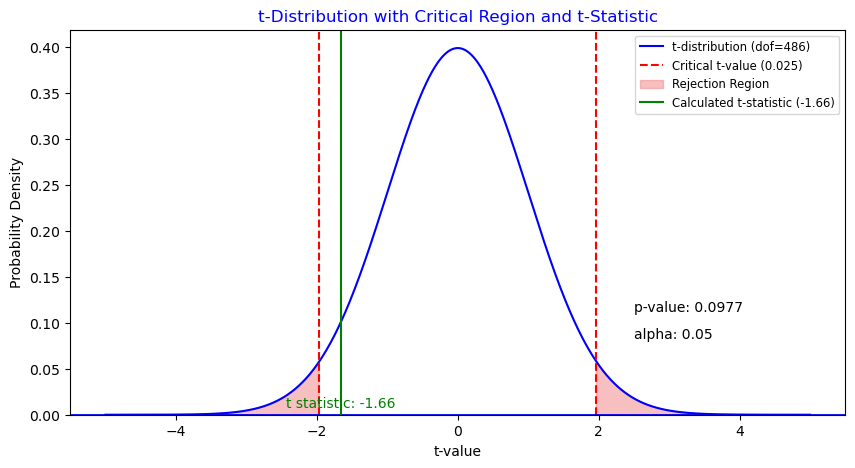

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Given values from your t-test
t_statistic = -1.659145539707629
p_value = 0.09773160551881048
dof = 486.0
alpha = 0.05

# Define the range for the t-distribution plot
x = np.linspace(-5, 5, 1000)

# Calculate the t-distribution
y = t.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the t-distribution
plt.plot(x, y, label=f't-distribution (dof={round(dof)})', color='blue')

# Mark the critical t-values for alpha/2 (two-tailed test)
t_critical = t.ppf(1 - alpha/2, dof)
plt.axvline(t_critical, color='red', linestyle='--', label=f'Critical t-value ({alpha/2})')
plt.axvline(-t_critical, color='red', linestyle='--')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Fill the rejection region(s) with light red
plt.fill_between(x, 0, y, where=(x >= t_critical) | (x <= -t_critical), color='lightcoral', alpha=0.5, label='Rejection Region')

# Mark the calculated t-statistic
plt.axvline(t_statistic, color='green', linestyle='-', label=f'Calculated t-statistic ({t_statistic:.2f})')

# Add text for p-value and alpha
plt.text(2.5, 0.112, f'p-value: {p_value:.4f}', fontsize=10)
plt.text(2.5, 0.083, f'alpha: {alpha}', fontsize=10)
plt.text(t_statistic, 0.02, f't statistic: {t_statistic:.2f}', color='green', fontsize=10, ha='center', va='top')

# Add titles and labels
plt.title('t-Distribution with Critical Region and t-Statistic', color='blue')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">Task-03: Is There a Relationship Between Glucose and Systolic Blood Pressure?</p>

#### <p style="background-color:#b82aad; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">One Way ANOVA (Analysis of Variance):</p>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>💡🚨📢👉 Compares the means of ``two or more`` ``independent groups`` ❗❗❗</strong></p>

**⭐ Draw a boxplot to see the relationship.**

**The following code creates a boxplot to visualize the relationship between ``glucose levels (gluc)`` and ``systolic blood pressure (ap_hi)``.**

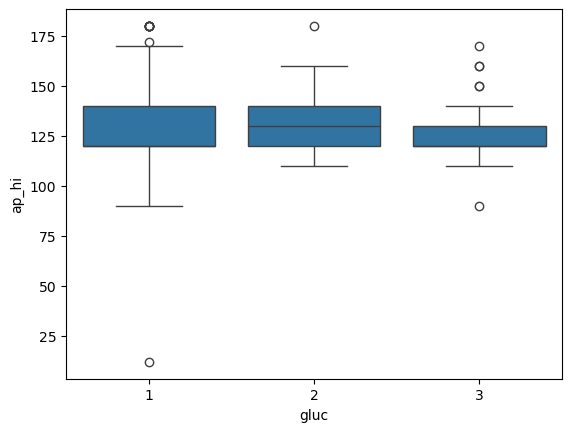

In [42]:
sns.boxplot(x="gluc", y="ap_hi",  data=df);

**⭐ Show the descriptive statistics of 3 groups.**

In [43]:
df.groupby("gluc").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,429.0,125.895105,17.643555,12.0,120.0,120.0,140.0,180.0
2,27.0,131.481481,16.802862,110.0,120.0,130.0,140.0,180.0
3,32.0,127.187500,16.506963,90.0,120.0,120.0,130.0,170.0


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Interpretation of Results:</span>
</p>

   - **``Glucose Level 1``**: This is the average systolic blood pressure for individuals categorized with normal glucose levels. Standard Deviation indicates moderate variability in systolic blood pressure among this group. Minimum seems unusually low and may indicate data entry errors or extreme outliers.

   - **``Glucose Level 2``**: This average is higher than that for glucose level 1, suggesting that individuals with elevated glucose levels tend to have higher systolic blood pressure. Standard Deviation indicates some variability, but the smaller sample size (27) may affect the reliability of this value.
Minimum represents a more reasonable minimum compared to glucose level 1.

   - **``Glucose Level 3``**: This average is lower than for glucose level 2 but indicates higher systolic blood pressure compared to glucose level 1. Standard Deviation indicates variability similar to that seen in glucose level 2.
Minimum represents a reasonable minimum value, suggesting that this group may have individuals with lower blood pressure readings.
<hr>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Summary of Findings:</span>
</p>

   - **``Trend in Mean Systolic Blood Pressure``**: There is a tendency for mean systolic blood pressure to increase with glucose levels, with the average for glucose level 1 being the lowest, followed by glucose level 3, and glucose level 2 having the highest average.
   - **``Variability``**: The standard deviations suggest moderate variability in systolic blood pressure across all glucose levels, though the smaller sample size for glucose level 2 could affect reliability.
   - **``Potential Outliers``**: The minimum value for glucose level 1 (12.0 mmHg) appears to be an outlier or data entry error, as it is unusually low. This warrants further investigation.
   - **``Clinical Implications``**: Higher average systolic blood pressure in individuals with elevated glucose levels may indicate a correlation between glucose metabolism and cardiovascular health. This could suggest a need for monitoring blood pressure in populations with higher glucose levels.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-01: Stating the null (H0) and alternative hypothesis (Ha or H1).</strong></p>

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-02-03: Calculating Test Statistic & p-value:</strong></p>

**⭐ Conduct the relavant statistical test to see if there is a significant difference betweenthe groups.**

In [44]:
anova_test = stats.f_oneway(df[df["gluc"]==1]["ap_hi"],
                               df[df["gluc"]==2]["ap_hi"],
                               df[df["gluc"]==3]["ap_hi"])

anova_test

# Large p-value suggests us fail to reject Ho. All means are, equal.

F_onewayResult(statistic=1.3349612801410242, pvalue=0.2641336028455026)

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-04: Comparing Test Statistic to Critical Value to Make a decision:</strong></p>

In [45]:
alpha = 0.05

if anova_test.pvalue < alpha:
    print('At {} level of significance, we can reject the Null hypothesis (H0) in favor of Alternative hypothesis (H1) \nand conclude that the differences among group means (at least one group) are statistically significant.'.format(alpha))
else:
    print('At {} level of significance, we FAIL to reject the Null hypothesis.'.format(alpha))

At 0.05 level of significance, we fail to reject the Null hypothesis.


#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-05: Visualizing the results:</strong></p>

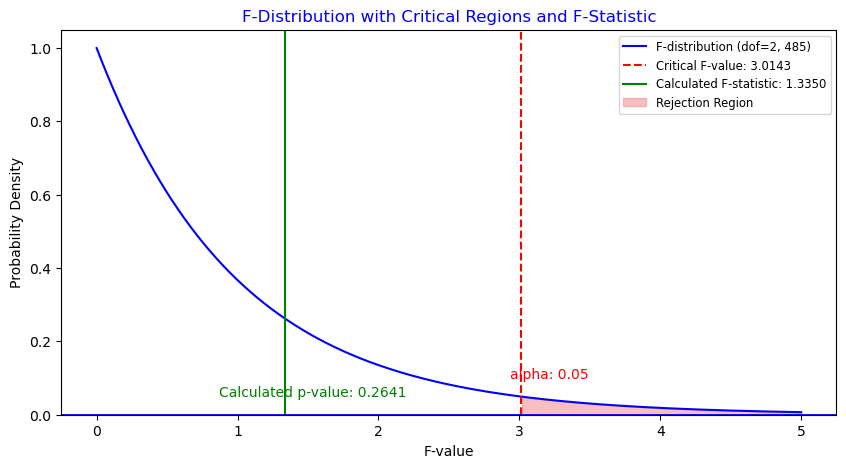

In [46]:
# Extract F-statistic and p-value
f_calculated = anova_test.statistic
p_value = anova_test.pvalue

# Degrees of freedom
k = len(df['gluc'].unique())  # Number of groups
n = df.shape[0]               # Total number of observations
dof_numerator = k - 1         # Degrees of freedom between groups
dof_denominator = n - k       # Degrees of freedom within groups


# Significance level
alpha = 0.05

# Critical F-value
f_critical = stats.f.ppf(1 - alpha, dof_numerator, dof_denominator)

# Define the range for the F-distribution plot
x = np.linspace(0, 5, 1000)
y = stats.f.pdf(x, dof_numerator, dof_denominator)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the F-distribution
plt.plot(x, y, label=f'F-distribution (dof={dof_numerator}, {dof_denominator})', color='blue')

# Mark the critical F-value
plt.axvline(f_critical, color='red', linestyle='--', label=f'Critical F-value: {f_critical:.4f}')

# Mark the calculated F-statistic
plt.axvline(f_calculated, color='green', linestyle='-', label=f'Calculated F-statistic: {f_calculated:.4f}')

# Fill the rejection region
plt.fill_between(x, 0, y, where=(x >= f_critical), color='lightcoral', alpha=0.5, label='Rejection Region')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Add text for p-value and alpha
plt.text(f_calculated + 0.2, 0.05, f'Calculated p-value: {p_value:.4f}', color='green', fontsize=10, ha='center')
plt.text(f_critical + 0.2, 0.1, f'alpha: {alpha}', fontsize=10, color='red', ha='center')

# Add titles and labels
plt.title('F-Distribution with Critical Regions and F-Statistic', color='blue')
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

<hr>

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>🎁 Bonus:</strong></p>

**The following code performs a ``pairwise comparison`` of the systolic blood pressure (ap_hi) across different glucose levels (gluc) using Tukey's Honest Significant Difference (HSD) test.**
- The code compares the mean systolic blood pressure (ap_hi) across different glucose levels (gluc).
- It uses Tukey's HSD test to identify which specific pairs of glucose levels have statistically significant differences in mean systolic blood pressure.
- The results will help in understanding how different glucose levels may affect systolic blood pressure, providing insights into potential health implications.

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# compare the height between each diet, using 95% confidence interval 
mc = MultiComparison(df['ap_hi'], df['gluc'])

tukey_result = mc.tukeyhsd(alpha=0.05)

print(tukey_result)
print('Unique gluc groups: {}'.format(mc.groupsunique))

# None of the pairwise comparisons show statistically significant differences in mean systolic blood pressure 
# between the glucose groups at the 0.05 significance level.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2   5.5864  0.244  -2.5901 13.7628  False
     1      3   1.2924 0.9147  -6.2592   8.844  False
     2      3   -4.294 0.6169 -15.0627  6.4747  False
-----------------------------------------------------
Unique gluc groups: [1 2 3]


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Summary of the Results:</span>
</p>

 - **``Columns:``**
   - **``group1 and group2``**: These columns indicate the two glucose groups being compared.
   - **``meandiff``**: The difference in mean systolic blood pressure between the two groups.
   - **``p-adj``**: The adjusted p-value for the comparison. This indicates the probability of observing the difference in means (or more extreme) under the null hypothesis.
   - **``lower and upper``**: These columns show the lower and upper bounds of the 95% confidence interval for the mean difference.
   - **``reject``**: This indicates whether the null hypothesis is rejected (True) or not (False) for the comparison.
<<hr>

- **``Group Comparisons:``**
  - **``Comparison between Group 1 and Group 2``**:
     - **``Mean Difference``**: 5.5864
     - **``Adjusted p-value``**: 0.244
     - **``Confidence Interval``**: [-2.5901, 13.7628]
     - **``Reject``**: False
     - **``Interpretation``**: The mean systolic blood pressure for Group 1 is higher than Group 2 by approximately 5.59 mmHg, but the difference is not statistically significant (p > 0.05). The confidence interval includes zero, indicating that there may not be a true difference.

  - **``Comparison between Group 1 and Group 3``**:
     - **``Mean Difference``**: 1.2924
     - **``Adjusted p-value``**: 0.9147
     - **``Confidence Interval``**: [-6.2592, 8.844]
     - **``Reject``**: False
     - **``Interpretation``**: The mean difference is only 1.29 mmHg, which is negligible and not statistically significant (p > 0.05). The confidence interval again includes zero, suggesting no meaningful difference.

  - **``Comparison between Group 2 and Group 3``**:
     - **``Mean Difference``**: -4.294
     - **``Adjusted p-value``**: 0.6169
     - **``Confidence Interval``**: [-15.0627, 6.4747]
     - **``Reject``**: False
     - **``Interpretation``**: Group 2 has a lower mean systolic blood pressure than Group 3 by approximately 4.29 mmHg, but this difference is not statistically significant (p > 0.05). The confidence interval includes zero, indicating no significant difference.
<hr>

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Overall Conclusion:</span>
</p>

  - **``No Statistically Significant Differences``**: None of the pairwise comparisons show statistically significant differences in mean systolic blood pressure between the glucose groups at the 0.05 significance level.
  - **``Implications``**: This suggests that, based on the current data, there is no strong evidence to indicate that systolic blood pressure varies significantly between the different glucose levels examined.

### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">Task-04: Is there a relationship between Physical activity vs. presence or absence of Cardiovascular disease?</p>

**⭐ Create a crosstab using Pandas.**

In [48]:
ct = pd.crosstab(df.active, df.cardio)
ct

cardio,0,1
active,,
0,55,60
1,197,176


#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-01: Stating the null (H0) and alternative hypothesis (Ha or H1).</strong></p>

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-02-03: Calculating Test Statistic & p-value:</strong></p>

**⭐ Conduct chi-square test to see if there is a relationship between 2 categorical variables.**

In [49]:
chi, p, dof, expctd = stats.chi2_contingency(ct)

print("statistic:", chi)
print("p value:", p)

statistic: 0.6876655564420912
p value: 0.406959548277278


#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-04: Comparing Test Statistic to Critical Value to Make a decision:</strong></p>

In [50]:
print('stat=%.3f, p=%.4f' % (chi, p))

if p > 0.05:
    print('Fail to reject Ho')
else:
    print('We reject the null hypothesis. The two categorical variables are dependent')

stat=0.688, p=0.4070
Fail to reject Ho


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Decision:</span>
</p>

  - The p-value (0.407) is greater than the common significance level (α = 0.05). Therefore, we fail to reject the null hypothesis (H₀).

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Conclusions:</span>
</p>

   - **``Independence of Variables``**: 
     - The failure to reject the null hypothesis indicates that there is no statistically significant relationship between physical activity levels and the presence or absence of cardiovascular disease. This suggests that variations in physical activity do not appear to be associated with differences in the occurrence of cardiovascular disease in this dataset.
   - **``Clinical Implications``**:
     - The results imply that, based on the data analyzed, physical activity does not significantly influence the likelihood of developing cardiovascular disease. However, this does not negate the importance of physical activity for overall health; it simply indicates that in this specific analysis, the relationship was not significant.
   - **``Further Considerations``**:
     - It's important to consider other factors that might influence cardiovascular health, such as diet, genetics, and other lifestyle factors. Additionally, examining different levels of physical activity (e.g., moderate vs. vigorous) could provide further insights.
     - A larger sample size or different demographic groups may yield different results, so further studies could be beneficial.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-05: Visualizing the results:</strong></p>

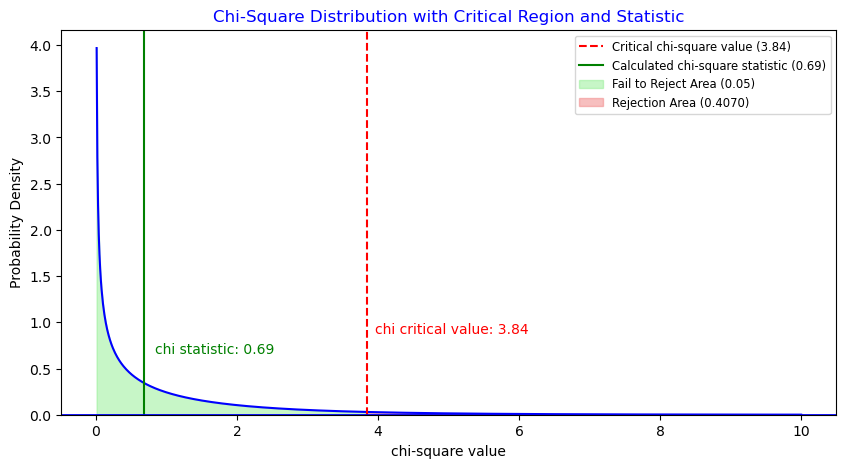

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Given values from your chi-square test
chi_statistic = 0.6876655564420912
calculated_p_value = 0.406959548277278
alpha = 0.05
dof = 1  # Degrees of freedom for chi-square test

# Define the range for the chi-square distribution plot
x = np.linspace(0, 10, 1000)

# Calculate the chi-square distribution
y = chi2.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the chi-square distribution
plt.plot(x, y, color='blue')

# Mark the critical chi-square value for alpha (two-tailed test)
chi_critical = chi2.ppf(1 - alpha, dof)
plt.axvline(chi_critical, color='red', linestyle='--', label=f'Critical chi-square value ({round(chi_critical, 2)})')

# Mark the calculated chi-square statistic
plt.axvline(chi_statistic, color='green', linestyle='-', label=f'Calculated chi-square statistic ({chi_statistic:.2f})')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Fill the area from 0 to critical chi square value with light green at defined alpha level
plt.fill_between(x, 0, y, where=(x < chi_critical), color='lightgreen', alpha=0.5, label=f'Fail to Reject Area ({alpha})')

# Fill the rejection area(s) with light red based on defined alpha level
plt.fill_between(x, 0, y, where=(x >= chi_critical), color='lightcoral', alpha=0.5, label=f'Rejection Area ({calculated_p_value:.4f})')

# Add text for p-value and alpha
# plt.text(7, 0.3, f'p-value: {calculated_p_value:.4f}', fontsize=10)
# plt.text(7, 0.25, f'alpha: {alpha}', fontsize=10, color='blue')  # Adjusted position and color for alpha
plt.text(chi_statistic + 1, chi_statistic + 0.1, f'chi statistic: {chi_statistic:.2f}', color='green', fontsize=10, ha='center', va='top')
plt.text(chi_critical + 1.2, 1, f'chi critical value: {chi_critical:.2f}', color='red', fontsize=10, ha='center', va='top')

# Add titles and labels
plt.title('Chi-Square Distribution with Critical Region and Statistic', color='blue')
plt.xlabel('chi-square value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

**``The critical chi-square value``** depends on the degrees of freedom (df) and the significance level (alpha) chosen for the test. In statistical tables or software, critical values of the chi-square distribution can be found for various degrees of freedom and significance levels (usually 0.05 or 0.01). These critical values are used to determine whether to reject the null hypothesis based on the calculated chi-square statistic.

- For example, in a chi-square test with 1 degree of freedom and a significance level of 0.05 (commonly used), the critical chi-square value can be found in chi-square distribution tables or computed using statistical software. This critical value represents the cutoff point beyond which we would reject the null hypothesis if our calculated chi-square statistic exceeds it.

If you're conducting a chi-square test using statistical software like Python (using libraries like SciPy or statsmodels), these critical values are often computed automatically or can be accessed through functions like chi2.ppf (percent point function) in SciPy, which gives the inverse cumulative distribution function.

### 🚩🔥🤔🔥 The chi-square distribution is NOT bell-shaped like the normal distribution; it's skewed to the right and starts from zero.

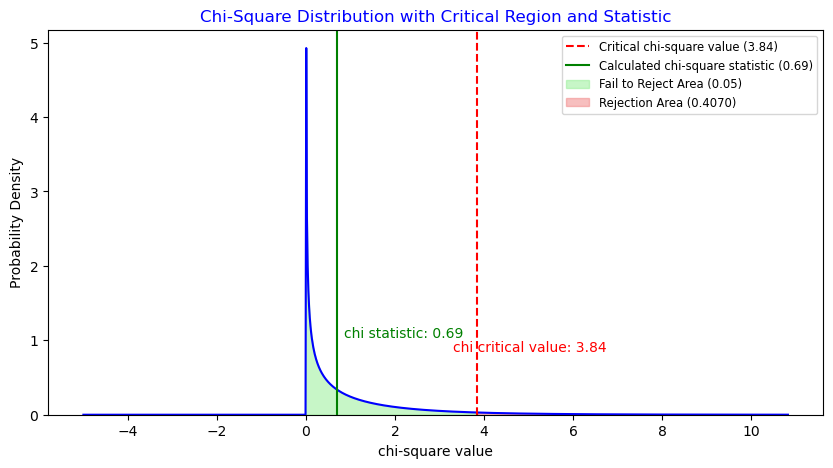

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Given values from your chi-square test
chi_statistic = 0.6876655564420912
calculated_p_value = 0.406959548277278
alpha = 0.05
dof = 1  # Degrees of freedom for chi-square test

# Define the range for the chi-square distribution plot
x = np.linspace(-5, chi2.ppf(0.999, dof), 1000)  # Extend x-axis to cover the chi-square distribution

# Calculate the chi-square distribution
y = chi2.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the chi-square distribution
plt.plot(x, y, color='blue')

# Mark the critical chi-square value for alpha (two-tailed test)
chi_critical = chi2.ppf(1 - alpha, dof)
plt.axvline(chi_critical, color='red', linestyle='--', label=f'Critical chi-square value ({round(chi_critical, 2)})')

# Mark the calculated chi-square statistic
plt.axvline(chi_statistic, color='green', linestyle='-', label=f'Calculated chi-square statistic ({chi_statistic:.2f})')

# Fill the area from 0 to critical chi square value with light green at defined alpha level
plt.fill_between(x, 0, y, where=(x < chi_critical), color='lightgreen', alpha=0.5, label=f'Fail to Reject Area ({alpha})')

# Fill the rejection area(s) with light red based on defined alpha level
plt.fill_between(x, 0, y, where=(x >= chi_critical), color='lightcoral', alpha=0.5, label=f'Rejection Area ({calculated_p_value:.4f})')

# Add text for p-value and alpha
# plt.text(7, 0.3, f'p-value: {calculated_p_value:.4f}', fontsize=10)
# plt.text(7, 0.25, f'alpha: {alpha}', fontsize=10)
plt.text(chi_statistic + 1.5, chi_statistic + 0.5, f'chi statistic: {chi_statistic:.2f}', color='green', fontsize=10, ha='center', va='top')
plt.text(chi_critical + 1.2, 1, f'chi critical value: {chi_critical:.2f}', color='red', fontsize=10, ha='center', va='top')

# Add titles and labels
plt.title('Chi-Square Distribution with Critical Region and Statistic', color='blue')
plt.xlabel('chi-square value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; border-radius:10px 10px;">Task-05: Is there a relationship between Cholesterol and presence or absence of Cardiovascular disease?</p>

**⭐ Create a crosstab using Pandas.**

In [53]:
ct = pd.crosstab(df.cholesterol, df.cardio)
ct

cardio,0,1
cholesterol,,
1,210,163
2,32,35
3,10,38


#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-01: Stating the null (H0) and alternative hypothesis (Ha or H1).</strong></p>

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-02-03: Calculating Test Statistic & p-value:</strong></p>

**⭐ Conduct chi-square test to see if there is a relationship between 2 categorical variables:**

In [54]:
chi, p, dof, expctd = stats.chi2_contingency(ct)

print("statistic:", chi)
print("p value:", p)
print("degrees of freedom:", dof)

statistic: 21.888853614778675
p value: 1.765614268966816e-05
degrees of freedom: 2


#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-04: Comparing Test Statistic to Critical Value to Make a decision:</strong></p>

In [55]:
print('stat=%.3f, p=%.4f' % (chi, p))

if p > 0.05:
    print('Fail to reject Ho')
else:
    print('We reject the null hypothesis. The two categorical variables are dependent')

stat=21.889, p=0.0000
We reject the null hypothesis. The two categorical variables are dependent


#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-05: Visualizing the results:</strong></p>

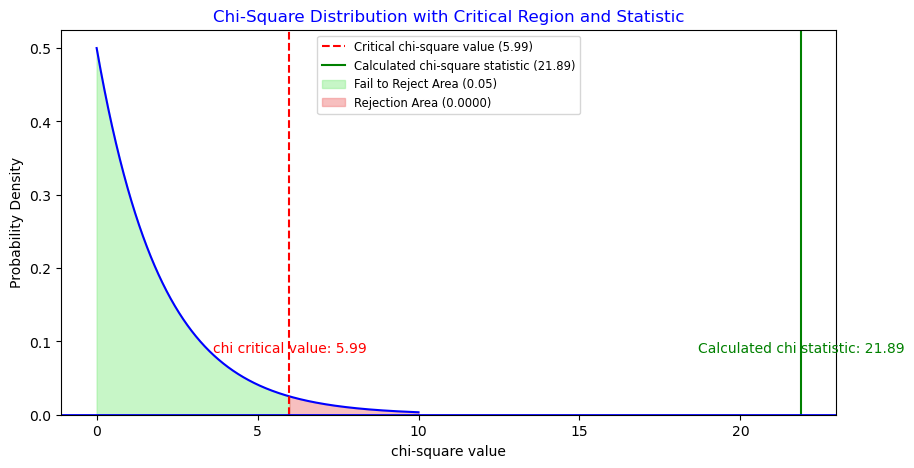

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Given values from your chi-square test
chi_statistic = 21.888853614778675
calculated_p_value = 1.765614268966816e-05
alpha = 0.05
dof = 2  # Degrees of freedom for chi-square test

# Define the range for the chi-square distribution plot
x = np.linspace(0, 10, 1000)

# Calculate the chi-square distribution
y = chi2.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the chi-square distribution
plt.plot(x, y, color='blue')

# Mark the critical chi-square value for alpha (two-tailed test)
chi_critical = chi2.ppf(1 - alpha, dof)
plt.axvline(chi_critical, color='red', linestyle='--', label=f'Critical chi-square value ({round(chi_critical, 2)})')

# Mark the calculated chi-square statistic
plt.axvline(chi_statistic, color='green', linestyle='-', label=f'Calculated chi-square statistic ({chi_statistic:.2f})')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Fill the area from 0 to critical chi square value with light green at defined alpha level
plt.fill_between(x, 0, y, where=(x < chi_critical), color='lightgreen', alpha=0.5, label=f'Fail to Reject Area ({alpha})')

# Fill the rejection area(s) with light red based on defined alpha level
plt.fill_between(x, 0, y, where=(x >= chi_critical), color='lightcoral', alpha=0.5, label=f'Rejection Area ({calculated_p_value:.4f})')

# Add text for p-value and alpha
# plt.text(7, 0.3, f'p-value: {calculated_p_value:.4f}', fontsize=10)
# plt.text(7, 0.25, f'alpha: {alpha}', fontsize=10, color='blue')  # Adjusted position and color for alpha
plt.text(chi_statistic, 0.1, f'Calculated chi statistic: {chi_statistic:.2f}', color='green', fontsize=10, ha='center', va='top')
plt.text(chi_critical, 0.1, f'chi critical value: {chi_critical:.2f}', color='red', fontsize=10, ha='center', va='top')

# Add titles and labels
plt.title('Chi-Square Distribution with Critical Region and Statistic', color='blue')
plt.xlabel('chi-square value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

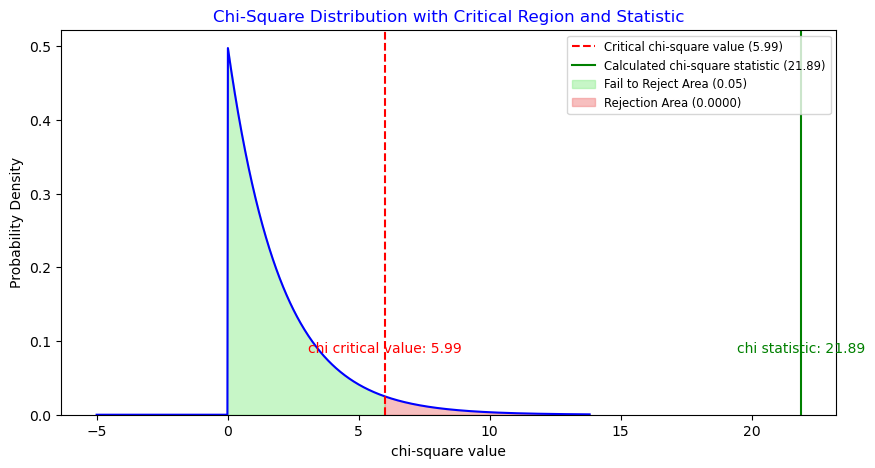

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Given values from your chi-square test
chi_statistic = 21.888853614778675
calculated_p_value = 1.765614268966816e-05
alpha = 0.05
dof = 2  # Degrees of freedom for chi-square test

# Define the range for the chi-square distribution plot
x = np.linspace(-5, chi2.ppf(0.999, dof), 1000)  # Extend x-axis to cover the chi-square distribution

# Calculate the chi-square distribution
y = chi2.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the chi-square distribution
plt.plot(x, y, color='blue')

# Mark the critical chi-square value for alpha (two-tailed test)
chi_critical = chi2.ppf(1 - alpha, dof)
plt.axvline(chi_critical, color='red', linestyle='--', label=f'Critical chi-square value ({round(chi_critical, 2)})')

# Mark the calculated chi-square statistic
plt.axvline(chi_statistic, color='green', linestyle='-', label=f'Calculated chi-square statistic ({chi_statistic:.2f})')

# Fill the area from 0 to critical chi square value with light green at defined alpha level
plt.fill_between(x, 0, y, where=(x < chi_critical), color='lightgreen', alpha=0.5, label=f'Fail to Reject Area ({alpha})')

# Fill the rejection area(s) with light red based on defined alpha level
plt.fill_between(x, 0, y, where=(x >= chi_critical), color='lightcoral', alpha=0.5, label=f'Rejection Area ({calculated_p_value:.4f})')

# Add text for p-value and alpha
# plt.text(7, 0.3, f'p-value: {calculated_p_value:.4f}', fontsize=10)
# plt.text(7, 0.25, f'alpha: {alpha}', fontsize=10)
plt.text(chi_statistic, 0.1, f'chi statistic: {chi_statistic:.2f}', color='green', fontsize=10, ha='center', va='top')
plt.text(chi_critical, 0.1, f'chi critical value: {chi_critical:.2f}', color='red', fontsize=10, ha='center', va='top')

# Add titles and labels
plt.title('Chi-Square Distribution with Critical Region and Statistic', color='blue')
plt.xlabel('chi-square value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Decision:</span>
</p>

   - The p-value is significantly smaller than the common significance level (α = 0.05). Therefore, we ``reject the null hypothesis (H₀)``.
   
<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Conclusions:</span>
</p>

   - **``Dependent Relationship``**: The rejection of the null hypothesis indicates that there is a statistically significant relationship between cholesterol levels and the presence or absence of cardiovascular disease. This means that variations in cholesterol levels are associated with differences in the occurrence of cardiovascular disease.
   - **``Clinical Implications``**:
The findings suggest that individuals with higher cholesterol levels may have a higher likelihood of having cardiovascular disease. This relationship can inform health assessments and interventions aimed at managing cholesterol to reduce cardiovascular risk.
   - **``Further Analysis``**:
It may be beneficial to explore the nature of this relationship further. For instance, you could look at the specific cholesterol levels associated with higher incidence rates of cardiovascular disease and consider other confounding factors (like age, diet, lifestyle) that might also influence this relationship.

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>STEP-06: Identify the group/s demonstrating difference:</strong></p>

- **``Post-Hoc Analysis:``**
   - To identify **``which specific groups differ``**, you can conduct a **``post-hoc analysis``** using **``pairwise comparisons``**. A common method to perform this kind of analysis is the Chi-squared test for independence for each pair of groups or using a method like **``Bonferroni correction``**.

**To determine which groups demonstrate differences in cholesterol levels concerning the presence or absence of cardiovascular disease, you can follow these steps:**

- **``Pairwise Comparison``**: Compare each pair of cholesterol levels using the Chi-squared test.

In [58]:
# Pairwise comparisons
results = {}
for i in range(1, 4):
    for j in range(i + 1, 4):
        pairwise_ct = ct.loc[[i, j]]
        chi2, p, dof, expected = stats.chi2_contingency(pairwise_ct)
        results[f'{i} vs {j}'] = {'chi2': chi2, 'p': p}

# Display results
for comparison, result in results.items():
    print(f"{comparison}: Chi2 = {result['chi2']:.3f}, p-value = {result['p']:.4f}")

1 vs 2: Chi2 = 1.346, p-value = 0.2460
1 vs 3: Chi2 = 20.044, p-value = 0.0000
2 vs 3: Chi2 = 7.624, p-value = 0.0058


<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Interpret Results:</span>
</p>

   - This approach allows you to identify which specific cholesterol levels show significant differences concerning cardiovascular disease. After running the pairwise comparisons, you will get ``Chi-squared statistics`` and ``p-values`` for ``each comparison``. If any of the p-values are below your significance level (e.g., 0.05), it indicates a significant difference between those specific cholesterol levels in relation to the presence of cardiovascular disease.

<p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;">
    👉 <span style="color:green;">Conclusions:</span>
</p>

   - Based on the Chi-squared test results and the subsequent pairwise comparisons, you can make statements about ``which cholesterol levels`` are ``associated with differences in the presence or absence of cardiovascular disease``.
   
   - **``Comparison of Cholesterol Level 1 vs. Level 2:``**
     - **``Chi-squared``**: 1.346
     - **``p-value``**: 0.2460
     - **``Statement``**: There is NO statistically significant difference between cholesterol level 1 and cholesterol level 2 regarding the presence of cardiovascular disease (p > 0.05). This suggests that individuals with cholesterol level 1 and those with cholesterol level 2 have a similar likelihood of having cardiovascular disease.
   - **``⭐🚀👉 Comparison of Cholesterol Level 1 vs. Level 3:``**
     - **``Chi-squared``**: 20.044
     - **``p-value``**: 0.0000
     - **``Statement``**: There is a statistically significant difference between cholesterol level 1 and cholesterol level 3 (p < 0.001). This indicates that individuals with cholesterol level 1 are significantly less likely to have cardiovascular disease compared to those with cholesterol level 3.
   - **``⭐🚀👉 Comparison of Cholesterol Level 2 vs. Level 3:``**
     - **``Chi-squared``**: 7.624
     - **``p-value``**: 0.0058
     - **``Statement``**: There is a statistically significant difference between cholesterol level 2 and cholesterol level 3 (p < 0.01). This suggests that individuals with cholesterol level 2 are also less likely to have cardiovascular disease compared to those with cholesterol level 3.

- **``Overall Conclusion:``**
  - Cholesterol Level 1 is associated with a significantly lower risk of cardiovascular disease compared to Cholesterol Level 3.
  - Cholesterol Level 2 also shows a significant difference when compared to Cholesterol Level 3, indicating that individuals with cholesterol level 2 are at greater risk than those with cholesterol level 1 but lower risk than those with cholesterol level 3.
  - There is no significant difference between Cholesterol Levels 1 and 2, indicating similar risk levels for cardiovascular disease.

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#E51A59; font-size:150%; text-align:center; border-radius:10px 10px;">End of the Session - 07</p>

<p style="text-align: center;"><img src="https://i.ibb.co/99DQ3TY/DS-Courses.png" class="img-fluid" 
alt="CLRSWY"></p>


<br><br><br>

<p style="text-align: center;"><img src="https://i.ibb.co/Rpz9L36/clarusway-logo-black.png" width="450" height="200" class="img-fluid" alt="CLRSWY_LOGO"></p>

<p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:130%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>